In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats

In [4]:
df = pd.read_csv("Historical_Valuations_TB.csv")
df.head()
df.dtypes

Market_Size     object
Market_Rank      int64
Item            object
Year             int64
Valuation      float64
dtype: object

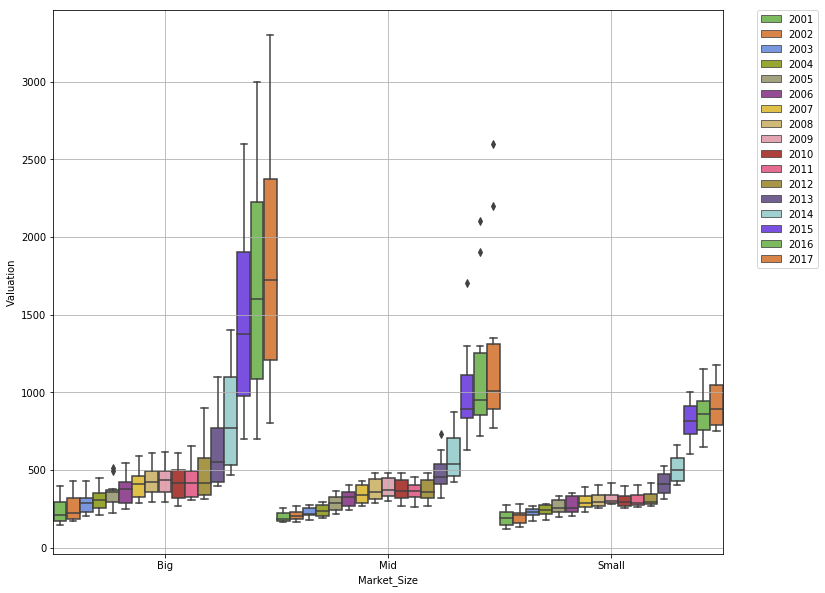

In [5]:
#df.boxplot(["Valuation"], by="Market_Size", figsize=(20, 10))

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
#legend = ["2001", "2002", "2003", "2004", "2005","2006","2007", "2008", "2009","2010","2011", "2012", "2013","2014","2015","2016","2017"]
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 10)
bplot = sns.boxplot(y='Valuation', x='Market_Size', 
                 data=df, 
                 width=1,
                 hue="Year", palette = pkmn_type_colors)
#plt.figure(figsize=(15,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid(True, which='both')

plt.savefig('Valuation_Histogram.png')

In [6]:
df_market = pd.pivot_table(df,index=["Market_Size", "Year"],values=["Valuation"],aggfunc=np.mean)
df_market
#pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=np.sum)

Valuation
Market_Size Year             
Big         2001   239.600000
            2002   259.600000
            2003   292.200000
            2004   312.300000
            2005   354.700000
            2006   377.200000
            2007   415.700000
            2008   432.400000
            2009   434.100000
            2010   422.700000
            2011   435.800000
            2012   493.500000
            2013   633.300000
            2014   831.900000
            2015  1512.000000
            2016  1724.000000
            2017  1862.500000
Mid         2001   197.100000
            2002   207.800000
            2003   227.700000
            2004   238.700000
            2005   286.700000
            2006   320.600000
            2007   343.700000
            2008   373.600000
            2009   386.900000
            2010   375.200000
            2011   362.600000
            2012   368.800000
            2013   479.500000
            2014   583.500000
            2015   999.000000
            2016  1155.000000
            2017  1281.500000
Small       2001   186.333333
            2002   201.555556
            2003   225.777778
            2004   240.222222
            2005   263.600000
            2006   273.000000
            2007   300.200000
            2008   311.400000
            2009   317.400000
            2010   303.100000
            2011   307.900000
            2012   315.300000
            2013   414.300000
            2014   507.500000
            2015   807.500000
            2016   857.000000
            2017   922.000000

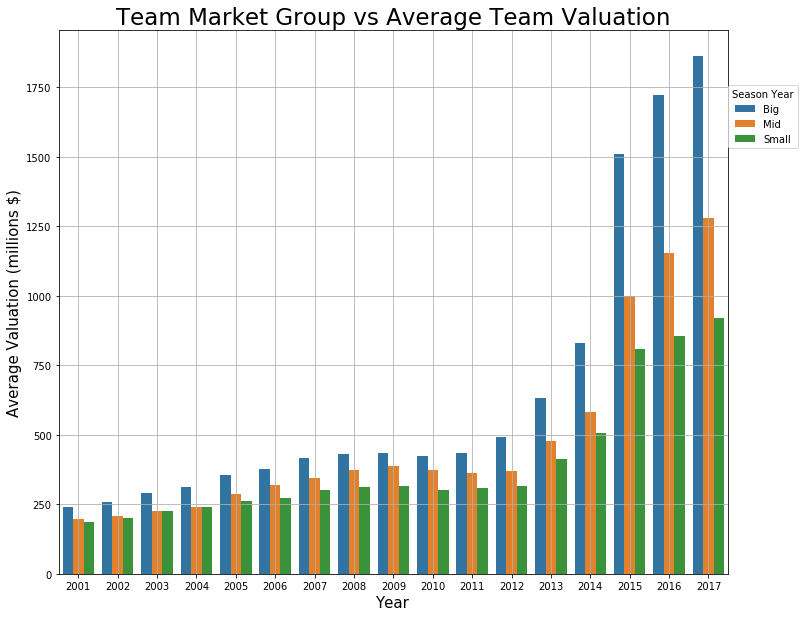

In [11]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 10)
sns.barplot(x="Year", y="Valuation", data=df_market.reset_index(), hue="Market_Size")
plt.xlabel("Year" , size = 15)
plt.ylabel("Average Valuation (millions $)" , size = 15)
plt.title("Team Market Group vs Average Team Valuation" , size = 23)
plt.legend(bbox_to_anchor = (1 , .9) , loc = 2 , borderaxespad = 0. , title = "Season Year")
ax.grid(True , which = "Both")
#sns.barplot(x='FinYear', y='Amount', data=invYr.reset_index())
#sns.barplot(x=invYr.index, y=invYr.Amount)
#ns.barplot(x="alcohol", y="abbrev", data=crashes,
           # label="Alcohol-involved", color="b")

In [33]:
df_team_5_big = df.loc[df['Item'].isin(['Golden State Warriors','New York Knicks','San Antonio Spurs','Boston Celtics','Los Angeles Lakers','Houston Rockets','Cleveland Cavaliers'])]
df_team_5_big2 = df_team_5_big[(df_team_5_big['Year']>=2012)] 

df_team_5_big2
df_team_5_big2.head()




,Market_Size,Market_Rank,Item,Year,Valuation
11,Big,1,New York Knicks,2012,780.0
12,Big,1,New York Knicks,2013,1100.0
13,Big,1,New York Knicks,2014,1400.0
14,Big,1,New York Knicks,2015,2500.0
15,Big,1,New York Knicks,2016,3000.0


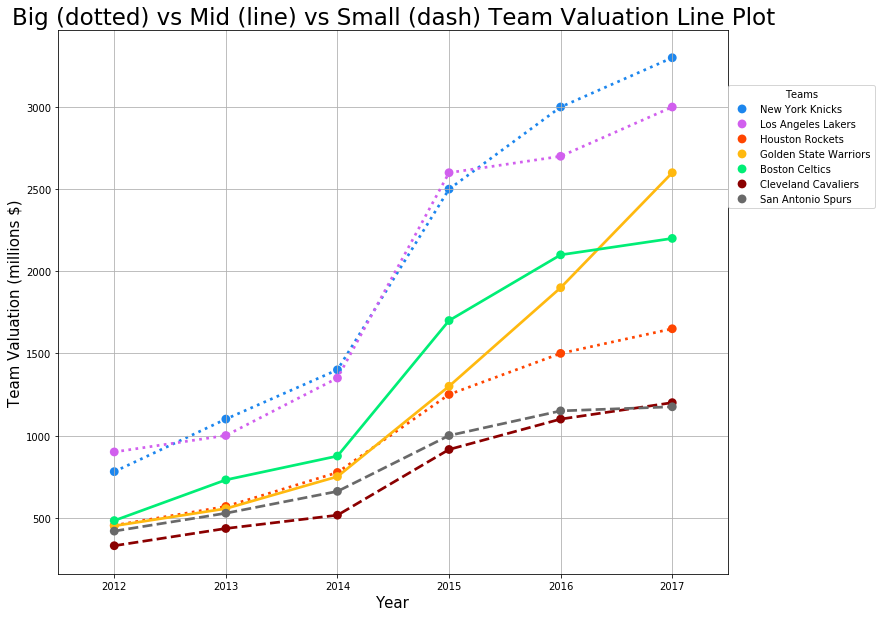

In [71]:

fig, ax = plt.subplots()

fig.set_size_inches(12, 10)
palette = ['#1C86EE', '#D15FEE', '#FF4500', '#FFB90F',  '#00EE76','#8B0000', '#696969']
ax = sns.pointplot(x="Year", y="Valuation",hue="Item", data=df_team_5_big2, linestyles=[":", ":",":","-", "-","--","--"], palette=palette)

plt.xlabel("Year" , size = 15)
plt.ylabel("Team Valuation (millions $)" , size = 15)
plt.title("Big (dotted) vs Mid (line) vs Small (dash) Team Valuation Line Plot" , size = 23)
plt.legend(bbox_to_anchor = (1 , .9) , loc = 2 , borderaxespad = 0. , title = "Teams")
ax.grid(True , which = "Both")